In [1]:
import transfer
from community import *
import  matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import numpy as np
from datetime import datetime

# There is an option to set a file-name -- would highly recommend doing that.
date_time = datetime.now().strftime("%m_%d_%Y_%H:%M:%S")


In [2]:
""" simulate returns an animated 3d scatter plot of the community allIdeas object.
The input parameters are the community, the interaction coefficient gamma, 
and also fn, a string file-name which defaults to date and time."""
def simulate(X=None, gamma = 0.005, T = 80,fn=date_time):
    # seems like the same community is used again and again if I do not specify None case below.
    if X is None:
        X = community(300,3)
    fps = 40

    # Data to store X.allIdeas, to then make animation
    dataX = np.zeros((T*fps,X.numberMembers))
    dataY = np.zeros((T*fps,X.numberMembers))
    dataZ = np.zeros((T*fps,X.numberMembers))

    # Iterate the idea transfer throughout community
    for t in range(0,T+1):
        np.random.seed()
        dataX[t,:] = X.allIdeas[:,0]
        dataY[t,:] = X.allIdeas[:,1]
        dataZ[t,:] = X.allIdeas[:,2]
        #transfer.deterministicMerge(X, gamma/(t+1)**0.5)
        transfer.probabilisticMerge(X, gamma,t)

    # Plot results
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter3D(dataX[0], dataY[0], dataZ[0])

    axTicks = np.linspace(-c.domainSize,c.domainSize,4)

    #animation function for animation.FuncAnimation
    def update(ifrm,dataX,dataY,dataZ):
        ax.clear()
        plt.autoscale(False)
        ax.set_xticks(axTicks)
        ax.set_yticks(axTicks)
        ax.set_zticks(axTicks)
        ax.scatter3D(dataX[ifrm], dataY[ifrm], dataZ[ifrm])
        ax.set_xlabel("frame: %d" % (ifrm))

    ani = animation.FuncAnimation(fig, update, T, fargs=(dataX,dataY,dataZ),interval = T/fps )
    ani.save(fn+'.gif',writer='imagemagick',fps=fps)

    #plt.show()
    
    return (dataX,dataY,dataZ)


(array([[ -5.,  -1.,  -4., ...,  -1.,   7.,  -1.],
        [  9., -10.,   3., ...,   4.,  -4.,  -9.],
        [  9., -10.,   3., ...,   4.,  -4.,  -9.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([[-7., -8.,  1., ...,  8.,  0., 10.],
        [-4., -9., -5., ...,  6.,  9.,  0.],
        [-4., -9., -5., ...,  6.,  9.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([[ 7., -9., -7., ...,  4., 10., -2.],
        [10., -7.,  2., ...,  6., -8., -7.],
        [10., -7.,  2., ...,  6., -8., -7.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]))

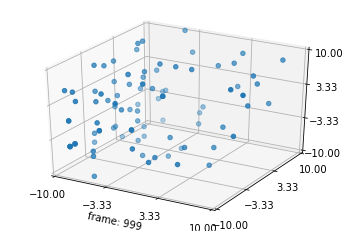

In [3]:
c = community(numberMembers=100,numberIdeas=3,domainSize=10)
simulate(c,gamma=0.1,T=1000)

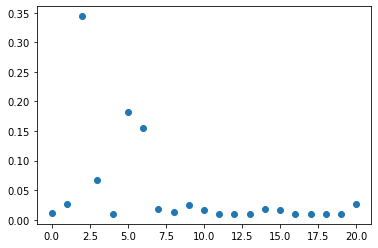

In [19]:
plt.plot(c.ideaDistribution[5][0],'o')
plt.show()

In [18]:
c.allGregariousness[8]

0.5251461700587695